In [11]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

In [12]:
#Reading city data csv
city_csvpath = os.path.join("raw_data","city_data.csv")
city_df=pd.read_csv(city_csvpath)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [13]:
#Reading ride data csv
ride_csvpath = os.path.join("raw_data","ride_data.csv")
ride_df=pd.read_csv(ride_csvpath)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [14]:
#Average fare per city
Average_fare_per_city = pd.DataFrame(ride_df.groupby('city').mean()['fare'])
Average_fare_per_city.rename(columns = {'fare':'Average fare'}, inplace = True)
Average_fare_per_city.head()

,Average fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [15]:
#Total rides per city
Total_rides_per_city = pd.DataFrame(ride_df.groupby('city').count()['fare'])
Total_rides_per_city.rename(columns = {'fare':'Total ride'}, inplace = True)
Total_rides_per_city.head()

,Total ride
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [16]:
#Summary dataframe to plot  
plot_df = city_df.sort_values('city')

#Rename type and driver_count columns
plot_df=plot_df.rename(columns={'type':'City Types', 'driver_count': 'Driver Count'})

#Change city column as index to merge dataframes
plot_df = plot_df.set_index('city')

#Make final dataframe by adding Average fare per city and Total rides per city
plot_df['Average fare'] =Average_fare_per_city['Average fare']
plot_df['Total ride'] =Total_rides_per_city['Total ride']
plot_df.head()

,Driver Count,City Types,Average fare,Total ride
city,,,,
Alvarezhaven,21,Urban,23.928710,31
Alyssaberg,67,Urban,20.609615,26
Anitamouth,16,Suburban,37.315556,9
Antoniomouth,21,Urban,23.625000,22
Aprilchester,49,Urban,21.981579,19


Text(0.5,1,'Pyber Ride sharing data(2016)')

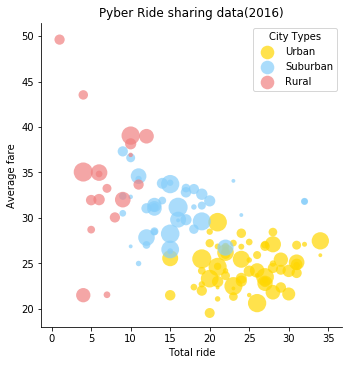

In [17]:
#Create bubble plot using seaborn and matplotlib libraries
sns.lmplot(x='Total ride', y='Average fare', data=plot_df,
           fit_reg=False,hue='City Types',palette=["gold", "lightskyblue", "lightcoral"],
           legend_out=False,scatter_kws={ "s":plot_df['Driver Count']*5,
           "alpha":0.7,"linewidth":0,"edgecolors":'k'}) 

#Set title for the plot
ax = plt.gca()
ax.set_title("Pyber Ride sharing data(2016)")

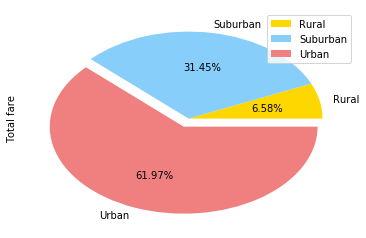

In [18]:
#% of Total Fares by City Type
Total_fare_per_city = pd.DataFrame(ride_df.groupby('city').sum()['fare'])
Total_fare_per_city.rename(columns = {'fare':'Total fare'}, inplace = True)
Total_fare_per_city.head()

#Add total fare per city column to the plot dataframe
plot_df['Total fare']=Total_fare_per_city['Total fare']

#Calculate Total fare by city type and add to pie plot dataframe
pie_plot1_df=pd.DataFrame(plot_df.groupby('City Types').sum()['Total fare'])

#Create pie plot using matplotlib
pie_plot1_df.plot.pie(y='Total fare',colors=["gold", "lightskyblue", "lightcoral"],autopct='%.2f%%',explode =[0,0,0.1])

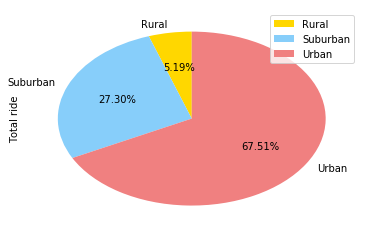

In [19]:
#% of Total Rides by City Type
#Calculate Total ride by city type and add to pie plot dataframe
pie_plot2_df=pd.DataFrame(plot_df.groupby('City Types').sum()['Total ride']) 

#Create pie plot using matplotlib
pie_plot2_df.plot.pie(y='Total ride',colors=["gold", "lightskyblue", "lightcoral"],autopct='%.2f%%',startangle=90)

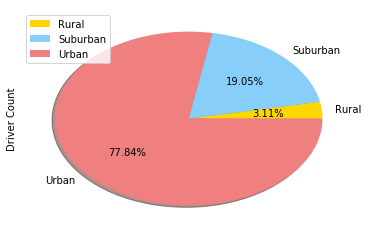

In [20]:
#% of Total Drivers by City Type
#Calculate driver count by city type and add to pie plot dataframe
pie_plot3_df=pd.DataFrame(plot_df.groupby('City Types').sum()['Driver Count'])


pie_plot3_df.plot.pie(y='Driver Count',colors=["gold", "lightskyblue", "lightcoral"],autopct='%.2f%%',shadow=True)